In [36]:
#https://www.tensorflow.org/tutorials/keras/classification
import tensorflow as tf
import keras 
import numpy as np 
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Softmax

print(tf.__version__)

2.3.1


In [37]:
#load dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [38]:
#specify category names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [48]:
#define the model
model = Sequential([Flatten(input_shape=(28,28)),Dense(128, activation='relu'),Dense(10)])
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
#train the model
model.fit(train_images,train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.3576 - accuracy: 0.6676
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7194 - accuracy: 0.7390
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6279 - accuracy: 0.7811
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5612 - accuracy: 0.8082
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5379 - accuracy: 0.8172
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5003 - accuracy: 0.8287
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4864 - accuracy: 0.8361
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4696 - accuracy: 0.8422
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4611 - accuracy: 0.8465
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.453

In [49]:
#evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy: %.2f' %(test_acc*100))

313/313 - 1s - loss: 0.5621 - accuracy: 0.8291

Test accuracy: 82.91


In [50]:
#predict test
probability_model = Sequential([model,Softmax()])
predictions = probability_model.predict(test_images)
for i in range(10):
     print("%d => %d (expected %d)" %(i, np.argmax(predictions[i]), test_labels[i]))

0 => 9 (expected 9)
1 => 2 (expected 2)
2 => 1 (expected 1)
3 => 1 (expected 1)
4 => 6 (expected 6)
5 => 1 (expected 1)
6 => 4 (expected 4)
7 => 6 (expected 6)
8 => 5 (expected 5)
9 => 7 (expected 7)


In [24]:
#show result
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

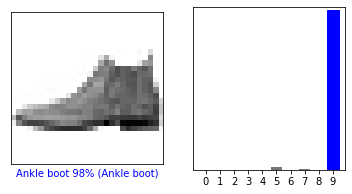

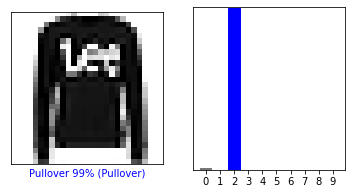

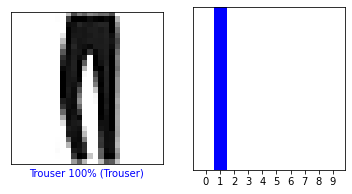

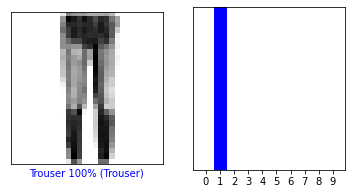

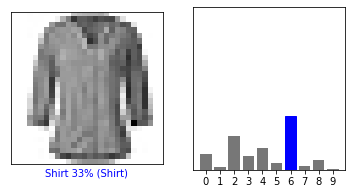

In [51]:
#check the result
for i in range(5):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show()

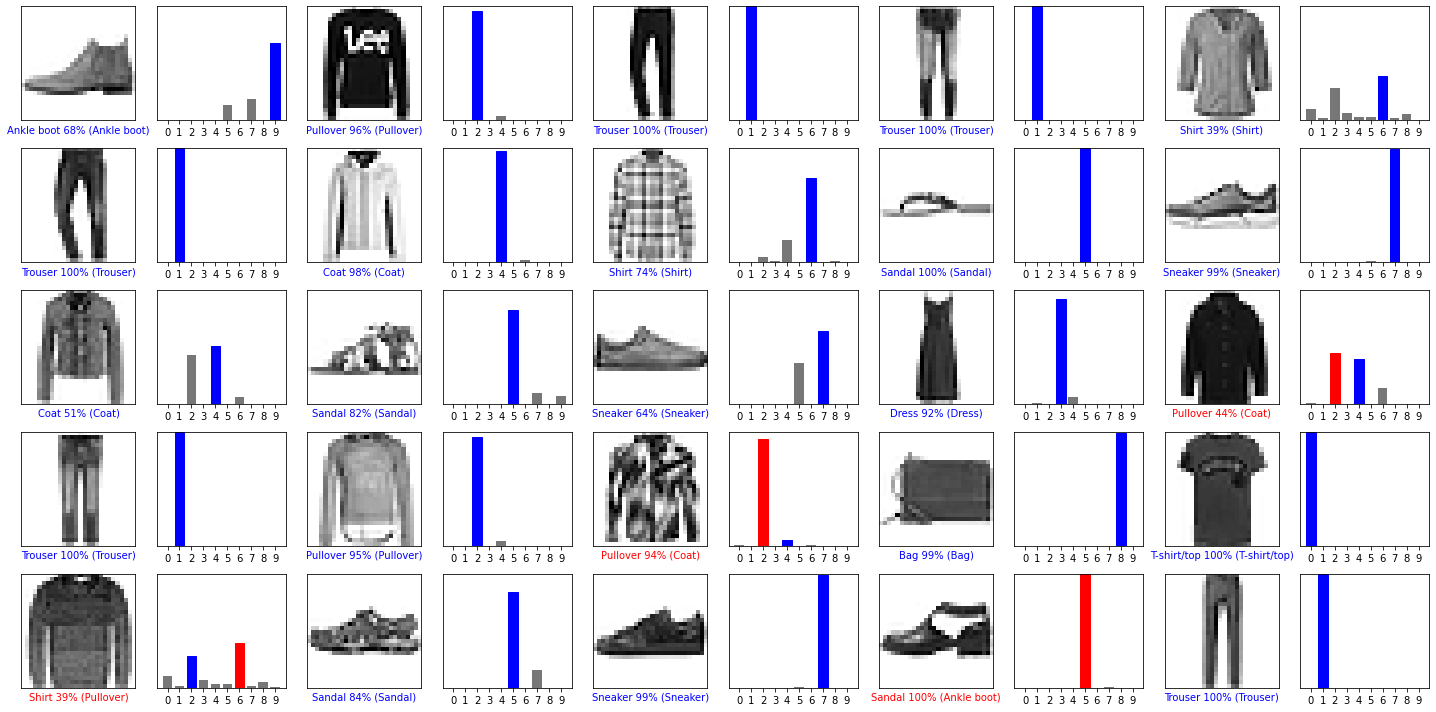

In [31]:
#check more test cases
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()